In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn import datasets
from sklearn.model_selection import train_test_split
np.set_printoptions(precision=3, suppress=False)

In [2]:
iris = datasets.load_iris( as_frame=True)
df = iris.data
df.columns = ['Sp Length', 'Sp Width', 'Pl Length', 'Pl Width']
df['target'] = iris.target
df

,Sp Length,Sp Width,Pl Length,Pl Width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


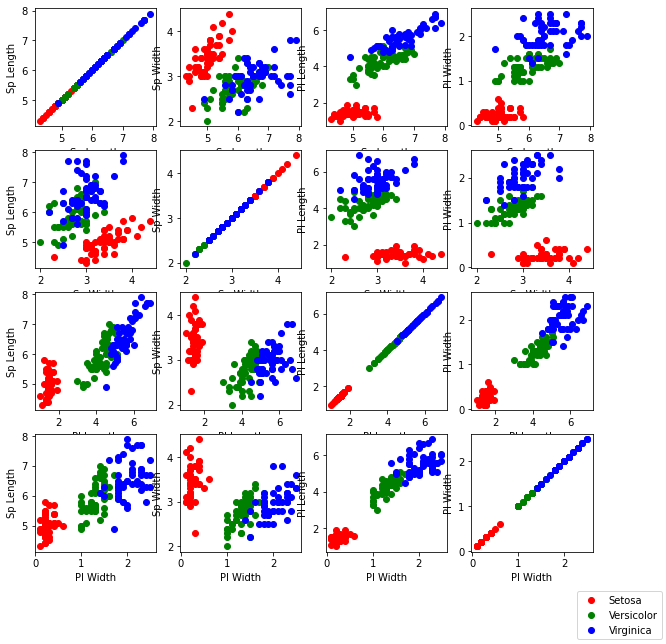

In [3]:
list_parameter = ['Sp Length', 'Sp Width', 'Pl Length', 'Pl Width']
figure, axis = plt.subplots(len(list_parameter),len(list_parameter), figsize=(10,10))
for i in range(len(list_parameter)):
    for j in range(len(list_parameter)):
        axis[i,j].plot(df[list_parameter[i]][df['target'] ==0], df[list_parameter[j]][df['target'] ==0], 'ro',)
        axis[i,j].plot(df[list_parameter[i]][df['target'] ==1], df[list_parameter[j]][df['target'] ==1], 'go',)
        axis[i,j].plot(df[list_parameter[i]][df['target'] ==2], df[list_parameter[j]][df['target'] ==2], 'bo',)
        axis[i,j].set_xlabel(list_parameter[i])
        axis[i,j].set_ylabel(list_parameter[j])
figure.legend(['Setosa', 'Versicolor', 'Virginica'], loc='lower right')
plt.show()

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(iris.data)
df['Predicted Cluster'] = kmeans.predict(iris.data)

In [5]:
df

,Sp Length,Sp Width,Pl Length,Pl Width,target,Predicted Cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0


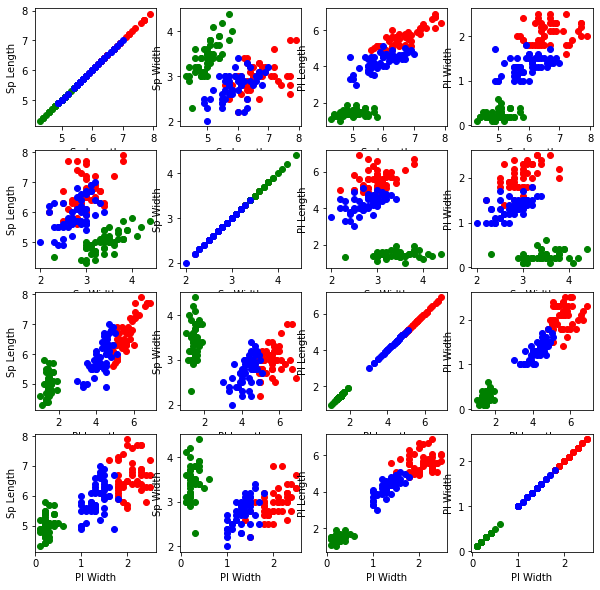

In [6]:
list_parameter = ['Sp Length', 'Sp Width', 'Pl Length', 'Pl Width']
figure, axis = plt.subplots(len(list_parameter),len(list_parameter), figsize=(10,10))
for i in range(len(list_parameter)):
    for j in range(len(list_parameter)):
        axis[i,j].plot(df[list_parameter[i]][df['Predicted Cluster'] ==0], df[list_parameter[j]][df['Predicted Cluster'] ==0], 'ro',)
        axis[i,j].plot(df[list_parameter[i]][df['Predicted Cluster'] ==1], df[list_parameter[j]][df['Predicted Cluster'] ==1], 'go',)
        axis[i,j].plot(df[list_parameter[i]][df['Predicted Cluster'] ==2], df[list_parameter[j]][df['Predicted Cluster'] ==2], 'bo',)
        axis[i,j].set_xlabel(list_parameter[i])
        axis[i,j].set_ylabel(list_parameter[j])

In [7]:
from sklearn.metrics import confusion_matrix

[[0.   1.   0.  ]
 [0.   0.   1.  ]
 [0.98 0.   0.02]]


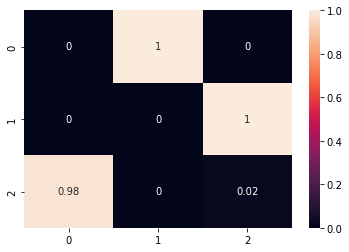

In [8]:
cf = confusion_matrix(df['target'], df['Predicted Cluster'], normalize='true')
sns.heatmap(cf, annot=True)
print(cf)